# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

#helper.download_extract('mnist', data_dir)
#helper.download_extract('celeba', data_dir)

## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

/usr/local/lib/python3.5/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


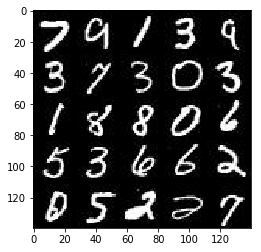

In [2]:
show_n_images = 25
data_dir = './data'
data_dir = '/input'
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

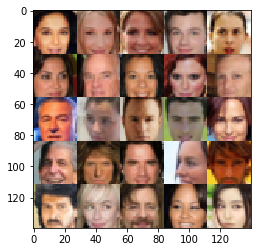

In [3]:
import helper
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import helper
# %matplotlib inline
# import os
# from glob import glob
# from matplotlib import pyplot
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, (None,image_width, image_height, image_channels), name="input_real")
    input_z = tf.placeholder(tf.float32, (None, z_dim), name="input_z")
    lr = tf.placeholder(tf.float32, name="learning_rate")

    return input_real, input_z, lr


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    alpha = 0.2
    # TODO: Implement Function
    with tf.variable_scope("discriminator", reuse=reuse):
        x1 = tf.layers.conv2d(images, 32, 5, strides=2, padding="same")
        x1 = tf.maximum(alpha*x1, x1)
        
        x2 = tf.layers.conv2d(x1, 64, 5, strides=2, padding="same")
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(alpha*x2, x2)
        
        x3 = tf.layers.conv2d(x2, 128, 5, strides=2, padding="same")
        x3 = tf.layers.batch_normalization(x3, training=True)
        x3 = tf.maximum(alpha*x3, x3)
        
        x4 = tf.layers.conv2d(x3, 256, 5, strides=2, padding="same")
        x4 = tf.layers.batch_normalization(x4, training=True)
        x4 = tf.maximum(alpha*x4, x4)
        
        x4 = tf.reshape(x3, (-1, 2*2*256))
        logits = tf.layers.dense(x4, 1)
        out = tf.sigmoid(logits)

    return out, logits

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse= not is_train):
        h1 = tf.layers.dense(z, units=4*4*512)
        h1 = tf.reshape(h1, (-1, 4, 4, 512))
        h1 = tf.layers.batch_normalization(h1, training=is_train)
        h1 = tf.maximum( 0.2 * h1, h1)
        
        h2 = tf.layers.conv2d_transpose(h1, filters=128, kernel_size=4, strides=1, padding='valid')
        h2 = tf.layers.batch_normalization(h2, training=is_train)
        h2 = tf.maximum(0.2 * h2, h2)
        
        h3 = tf.layers.conv2d_transpose(h2, filters=64, kernel_size=5, strides=2, padding='same')
        h3 = tf.layers.batch_normalization(h3, training=is_train)
        h3 = tf.maximum(0.2 * h3, h3)
        
        h3 = tf.layers.conv2d_transpose(h3, filters=32, kernel_size=5, strides=2, padding='same')
        h3 = tf.layers.batch_normalization(h3, training=is_train)
        h3 = tf.maximum(0.2 * h3, h3)
        
        logits = tf.layers.conv2d_transpose(h3, filters=out_channel_dim, kernel_size=3, strides=1, padding='same')
        out = tf.tanh(logits)
    
        return out



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    gen_model = generator(input_z, out_channel_dim)
    disc_model_real, disc_logits_real = discriminator(input_real)
    disc_model_fake, disc_logits_fake = discriminator(gen_model, reuse=True)
    
    disc_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=disc_logits_real,
                                                                           labels=tf.ones_like(disc_model_real)*(1-0.1)))
    disc_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=disc_logits_fake,
                                                                           labels=tf.zeros_like(disc_model_fake)))
    gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=disc_logits_fake,
                                                                     labels=tf.ones_like(disc_model_fake)))
    
    disc_loss = disc_loss_real + disc_loss_fake
    
    return disc_loss, gen_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    train_vars = tf.trainable_variables()
    gen_vars = [x for x in train_vars if x.name.startswith('generator')]
    disc_vars = [x for x in train_vars if x.name.startswith('discriminator')]
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        disc_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(d_loss, var_list=disc_vars)
        gen_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(g_loss, var_list=gen_vars)
    
    return disc_train_opt, gen_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    print_every = 10
    show_every = 100
    step = 0
    
    samples, width, height, channels = data_shape
    
    input_real, input_z, lr = model_inputs(width, height, channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, channels)
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    saver = tf.train.Saver()

    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                

                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                batch_images = batch_images * 2.0

                # Run optimizers
                sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                sess.run(g_train_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                
                steps += 1
                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_real: batch_images, input_z: batch_z})
                    train_loss_g = g_loss.eval({input_real: batch_images, input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % show_every == 0:
                    show_generator_output(sess, 16, input_z, channels, data_image_mode)
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 2.0293... Generator Loss: 0.3265
Epoch 1/2... Discriminator Loss: 1.6737... Generator Loss: 0.4930
Epoch 1/2... Discriminator Loss: 1.4583... Generator Loss: 0.6595
Epoch 1/2... Discriminator Loss: 1.3904... Generator Loss: 0.6813
Epoch 1/2... Discriminator Loss: 1.5180... Generator Loss: 0.6500
Epoch 1/2... Discriminator Loss: 1.6531... Generator Loss: 0.6850
Epoch 1/2... Discriminator Loss: 1.4031... Generator Loss: 0.8199
Epoch 1/2... Discriminator Loss: 1.3363... Generator Loss: 0.8602
Epoch 1/2... Discriminator Loss: 1.2485... Generator Loss: 0.9827
Epoch 1/2... Discriminator Loss: 1.2024... Generator Loss: 1.0280


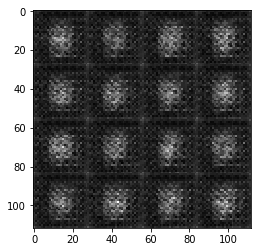

Epoch 1/2... Discriminator Loss: 0.9760... Generator Loss: 1.2099
Epoch 1/2... Discriminator Loss: 1.0000... Generator Loss: 1.1496
Epoch 1/2... Discriminator Loss: 0.9610... Generator Loss: 1.1155
Epoch 1/2... Discriminator Loss: 1.1198... Generator Loss: 0.9198
Epoch 1/2... Discriminator Loss: 1.3573... Generator Loss: 0.8666
Epoch 1/2... Discriminator Loss: 1.3250... Generator Loss: 0.8690
Epoch 1/2... Discriminator Loss: 1.3072... Generator Loss: 0.8701
Epoch 1/2... Discriminator Loss: 1.1633... Generator Loss: 1.0007
Epoch 1/2... Discriminator Loss: 1.3346... Generator Loss: 0.8302
Epoch 1/2... Discriminator Loss: 1.2674... Generator Loss: 0.9082


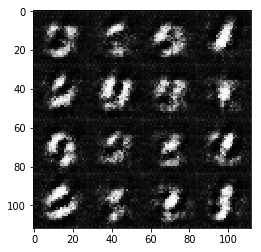

Epoch 1/2... Discriminator Loss: 1.3439... Generator Loss: 0.8249
Epoch 1/2... Discriminator Loss: 1.3525... Generator Loss: 0.8653
Epoch 1/2... Discriminator Loss: 1.2516... Generator Loss: 0.8952
Epoch 1/2... Discriminator Loss: 1.3492... Generator Loss: 0.8249
Epoch 1/2... Discriminator Loss: 1.2470... Generator Loss: 0.9091
Epoch 1/2... Discriminator Loss: 1.3426... Generator Loss: 0.8448
Epoch 1/2... Discriminator Loss: 1.2635... Generator Loss: 0.8865
Epoch 1/2... Discriminator Loss: 1.2306... Generator Loss: 0.8543
Epoch 1/2... Discriminator Loss: 1.2890... Generator Loss: 0.8624
Epoch 1/2... Discriminator Loss: 1.2369... Generator Loss: 0.9487


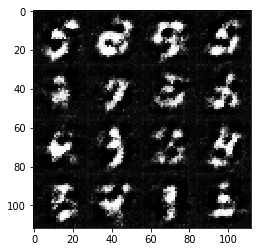

Epoch 1/2... Discriminator Loss: 1.2642... Generator Loss: 0.8529
Epoch 1/2... Discriminator Loss: 1.2591... Generator Loss: 0.9158
Epoch 1/2... Discriminator Loss: 1.2470... Generator Loss: 0.8648
Epoch 1/2... Discriminator Loss: 1.2975... Generator Loss: 0.6958
Epoch 1/2... Discriminator Loss: 1.2328... Generator Loss: 0.9644
Epoch 1/2... Discriminator Loss: 1.2255... Generator Loss: 1.0293
Epoch 1/2... Discriminator Loss: 1.2318... Generator Loss: 0.8874
Epoch 1/2... Discriminator Loss: 1.2810... Generator Loss: 0.7328
Epoch 1/2... Discriminator Loss: 1.2214... Generator Loss: 0.8558
Epoch 1/2... Discriminator Loss: 1.4092... Generator Loss: 0.5083


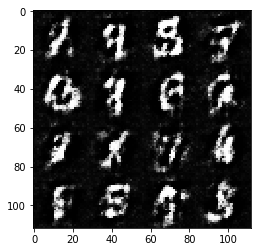

Epoch 1/2... Discriminator Loss: 1.1525... Generator Loss: 0.9878
Epoch 1/2... Discriminator Loss: 1.3062... Generator Loss: 0.6424
Epoch 1/2... Discriminator Loss: 1.3109... Generator Loss: 0.9210
Epoch 1/2... Discriminator Loss: 1.1606... Generator Loss: 0.8572
Epoch 1/2... Discriminator Loss: 1.2614... Generator Loss: 0.7236
Epoch 1/2... Discriminator Loss: 1.2121... Generator Loss: 0.8235
Epoch 1/2... Discriminator Loss: 1.1400... Generator Loss: 1.1432
Epoch 1/2... Discriminator Loss: 1.1784... Generator Loss: 0.8029
Epoch 1/2... Discriminator Loss: 1.1636... Generator Loss: 0.9995
Epoch 1/2... Discriminator Loss: 1.1611... Generator Loss: 0.8141


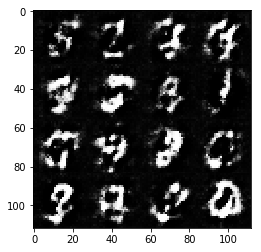

Epoch 1/2... Discriminator Loss: 1.2817... Generator Loss: 0.6463
Epoch 1/2... Discriminator Loss: 1.1232... Generator Loss: 0.9502
Epoch 1/2... Discriminator Loss: 1.1003... Generator Loss: 1.2196
Epoch 1/2... Discriminator Loss: 1.2422... Generator Loss: 0.6762
Epoch 1/2... Discriminator Loss: 1.2132... Generator Loss: 0.7801
Epoch 1/2... Discriminator Loss: 1.1523... Generator Loss: 0.8821
Epoch 1/2... Discriminator Loss: 1.1277... Generator Loss: 0.8663
Epoch 1/2... Discriminator Loss: 1.1015... Generator Loss: 1.1076
Epoch 1/2... Discriminator Loss: 1.1490... Generator Loss: 0.7873
Epoch 1/2... Discriminator Loss: 1.0981... Generator Loss: 0.8181


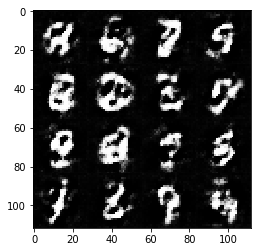

Epoch 1/2... Discriminator Loss: 1.1043... Generator Loss: 1.1957
Epoch 1/2... Discriminator Loss: 1.0923... Generator Loss: 0.9899
Epoch 1/2... Discriminator Loss: 1.1522... Generator Loss: 0.8017
Epoch 1/2... Discriminator Loss: 1.1686... Generator Loss: 0.7197
Epoch 1/2... Discriminator Loss: 1.1983... Generator Loss: 0.7875
Epoch 1/2... Discriminator Loss: 1.2445... Generator Loss: 1.4444
Epoch 1/2... Discriminator Loss: 1.0901... Generator Loss: 1.0018
Epoch 1/2... Discriminator Loss: 1.1734... Generator Loss: 0.7231
Epoch 1/2... Discriminator Loss: 1.3750... Generator Loss: 1.5179
Epoch 1/2... Discriminator Loss: 1.1757... Generator Loss: 1.0920


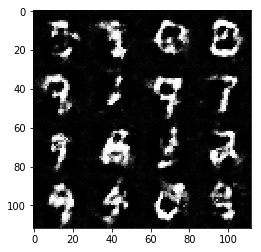

Epoch 1/2... Discriminator Loss: 1.1637... Generator Loss: 0.7634
Epoch 1/2... Discriminator Loss: 1.0785... Generator Loss: 1.1904
Epoch 1/2... Discriminator Loss: 1.1388... Generator Loss: 0.8683
Epoch 1/2... Discriminator Loss: 1.2117... Generator Loss: 0.8841
Epoch 1/2... Discriminator Loss: 1.2141... Generator Loss: 0.8927
Epoch 1/2... Discriminator Loss: 1.1998... Generator Loss: 1.0054
Epoch 1/2... Discriminator Loss: 1.2139... Generator Loss: 0.9954
Epoch 1/2... Discriminator Loss: 1.1937... Generator Loss: 0.7767
Epoch 1/2... Discriminator Loss: 1.2478... Generator Loss: 0.7228
Epoch 1/2... Discriminator Loss: 1.2261... Generator Loss: 1.2517


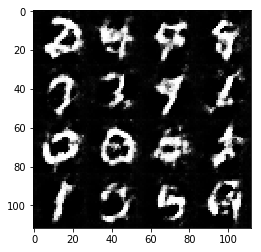

Epoch 1/2... Discriminator Loss: 1.2347... Generator Loss: 1.1126
Epoch 1/2... Discriminator Loss: 1.1868... Generator Loss: 1.1061
Epoch 1/2... Discriminator Loss: 1.1991... Generator Loss: 1.0689
Epoch 1/2... Discriminator Loss: 1.2392... Generator Loss: 0.7115
Epoch 1/2... Discriminator Loss: 1.2257... Generator Loss: 0.8076
Epoch 1/2... Discriminator Loss: 1.3041... Generator Loss: 0.6475
Epoch 1/2... Discriminator Loss: 1.2089... Generator Loss: 0.8073
Epoch 1/2... Discriminator Loss: 1.2149... Generator Loss: 1.0391
Epoch 1/2... Discriminator Loss: 1.3019... Generator Loss: 0.6708
Epoch 1/2... Discriminator Loss: 1.3320... Generator Loss: 0.6451


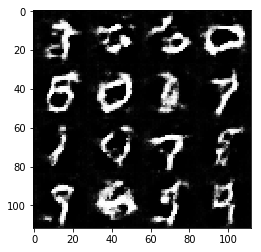

Epoch 1/2... Discriminator Loss: 1.2652... Generator Loss: 1.1518
Epoch 1/2... Discriminator Loss: 1.1743... Generator Loss: 1.1729
Epoch 1/2... Discriminator Loss: 1.2985... Generator Loss: 0.7313
Epoch 2/2... Discriminator Loss: 1.2093... Generator Loss: 0.9646
Epoch 2/2... Discriminator Loss: 1.2126... Generator Loss: 1.1082
Epoch 2/2... Discriminator Loss: 1.1964... Generator Loss: 0.9898
Epoch 2/2... Discriminator Loss: 1.2032... Generator Loss: 0.8193
Epoch 2/2... Discriminator Loss: 1.2617... Generator Loss: 0.6330
Epoch 2/2... Discriminator Loss: 1.1889... Generator Loss: 1.1036
Epoch 2/2... Discriminator Loss: 1.2777... Generator Loss: 0.8375


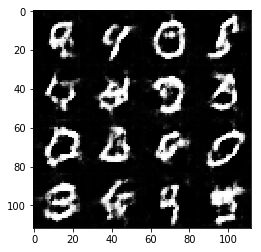

Epoch 2/2... Discriminator Loss: 1.2470... Generator Loss: 1.0280
Epoch 2/2... Discriminator Loss: 1.2486... Generator Loss: 0.7429
Epoch 2/2... Discriminator Loss: 1.2461... Generator Loss: 0.8131
Epoch 2/2... Discriminator Loss: 1.2183... Generator Loss: 1.0352
Epoch 2/2... Discriminator Loss: 1.2224... Generator Loss: 0.8664
Epoch 2/2... Discriminator Loss: 1.2866... Generator Loss: 0.7849
Epoch 2/2... Discriminator Loss: 1.2491... Generator Loss: 0.8811
Epoch 2/2... Discriminator Loss: 1.2401... Generator Loss: 0.8430
Epoch 2/2... Discriminator Loss: 1.3646... Generator Loss: 1.1929
Epoch 2/2... Discriminator Loss: 1.3378... Generator Loss: 0.6528


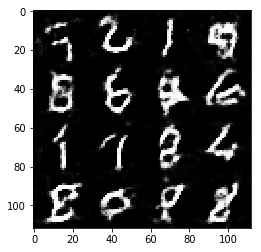

Epoch 2/2... Discriminator Loss: 1.2285... Generator Loss: 1.0087
Epoch 2/2... Discriminator Loss: 1.2480... Generator Loss: 0.7374
Epoch 2/2... Discriminator Loss: 1.2229... Generator Loss: 0.8391
Epoch 2/2... Discriminator Loss: 1.2770... Generator Loss: 0.6674
Epoch 2/2... Discriminator Loss: 1.3067... Generator Loss: 0.7926
Epoch 2/2... Discriminator Loss: 1.1663... Generator Loss: 0.9593
Epoch 2/2... Discriminator Loss: 1.2391... Generator Loss: 0.9785
Epoch 2/2... Discriminator Loss: 1.3064... Generator Loss: 0.8609
Epoch 2/2... Discriminator Loss: 1.3412... Generator Loss: 0.6076
Epoch 2/2... Discriminator Loss: 1.2365... Generator Loss: 0.9989


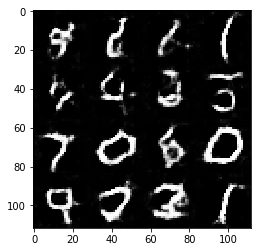

Epoch 2/2... Discriminator Loss: 1.2447... Generator Loss: 0.6972
Epoch 2/2... Discriminator Loss: 1.2238... Generator Loss: 0.7975
Epoch 2/2... Discriminator Loss: 1.2949... Generator Loss: 0.7359
Epoch 2/2... Discriminator Loss: 1.2959... Generator Loss: 0.6493
Epoch 2/2... Discriminator Loss: 1.2049... Generator Loss: 1.1020
Epoch 2/2... Discriminator Loss: 1.2959... Generator Loss: 1.1588
Epoch 2/2... Discriminator Loss: 1.2451... Generator Loss: 0.6959
Epoch 2/2... Discriminator Loss: 1.2687... Generator Loss: 0.9215
Epoch 2/2... Discriminator Loss: 1.3711... Generator Loss: 0.5947
Epoch 2/2... Discriminator Loss: 1.3039... Generator Loss: 0.6432


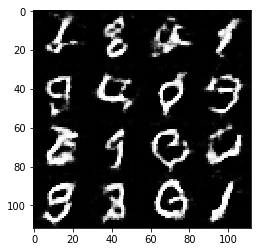

Epoch 2/2... Discriminator Loss: 1.3257... Generator Loss: 0.6073
Epoch 2/2... Discriminator Loss: 1.2230... Generator Loss: 0.9454
Epoch 2/2... Discriminator Loss: 1.2161... Generator Loss: 1.0956
Epoch 2/2... Discriminator Loss: 1.2443... Generator Loss: 1.1725
Epoch 2/2... Discriminator Loss: 1.2459... Generator Loss: 0.8616
Epoch 2/2... Discriminator Loss: 1.2758... Generator Loss: 0.6150
Epoch 2/2... Discriminator Loss: 1.2276... Generator Loss: 1.0859
Epoch 2/2... Discriminator Loss: 1.2365... Generator Loss: 0.6683
Epoch 2/2... Discriminator Loss: 1.2010... Generator Loss: 0.8514
Epoch 2/2... Discriminator Loss: 1.2725... Generator Loss: 0.9490


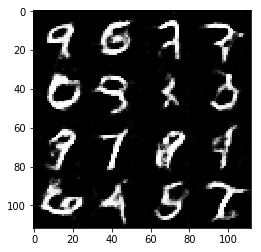

Epoch 2/2... Discriminator Loss: 1.2418... Generator Loss: 1.0516
Epoch 2/2... Discriminator Loss: 1.1929... Generator Loss: 0.8043
Epoch 2/2... Discriminator Loss: 1.2341... Generator Loss: 0.8045
Epoch 2/2... Discriminator Loss: 1.2967... Generator Loss: 0.6855
Epoch 2/2... Discriminator Loss: 1.2126... Generator Loss: 0.8611
Epoch 2/2... Discriminator Loss: 1.2330... Generator Loss: 0.7154
Epoch 2/2... Discriminator Loss: 1.1540... Generator Loss: 1.0946
Epoch 2/2... Discriminator Loss: 1.3161... Generator Loss: 0.7068
Epoch 2/2... Discriminator Loss: 1.3501... Generator Loss: 0.7930
Epoch 2/2... Discriminator Loss: 1.1886... Generator Loss: 1.1267


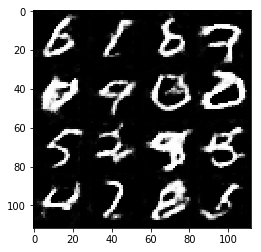

Epoch 2/2... Discriminator Loss: 1.2802... Generator Loss: 0.6608
Epoch 2/2... Discriminator Loss: 1.2436... Generator Loss: 0.7399
Epoch 2/2... Discriminator Loss: 1.2157... Generator Loss: 0.9591
Epoch 2/2... Discriminator Loss: 1.2725... Generator Loss: 0.6566
Epoch 2/2... Discriminator Loss: 1.2540... Generator Loss: 0.7256
Epoch 2/2... Discriminator Loss: 1.2039... Generator Loss: 0.7086
Epoch 2/2... Discriminator Loss: 1.2304... Generator Loss: 0.8012
Epoch 2/2... Discriminator Loss: 1.2852... Generator Loss: 0.7730
Epoch 2/2... Discriminator Loss: 1.3883... Generator Loss: 1.2379
Epoch 2/2... Discriminator Loss: 1.2499... Generator Loss: 0.7568


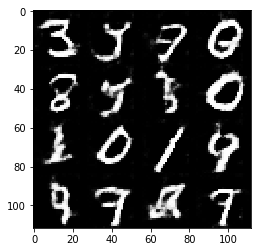

Epoch 2/2... Discriminator Loss: 1.2836... Generator Loss: 1.1104
Epoch 2/2... Discriminator Loss: 1.2564... Generator Loss: 0.7884
Epoch 2/2... Discriminator Loss: 1.1693... Generator Loss: 0.9290
Epoch 2/2... Discriminator Loss: 1.2432... Generator Loss: 0.6960
Epoch 2/2... Discriminator Loss: 1.3100... Generator Loss: 0.6873
Epoch 2/2... Discriminator Loss: 1.2347... Generator Loss: 1.2478
Epoch 2/2... Discriminator Loss: 1.1658... Generator Loss: 0.9704
Epoch 2/2... Discriminator Loss: 1.2306... Generator Loss: 0.7326
Epoch 2/2... Discriminator Loss: 1.4219... Generator Loss: 0.5037
Epoch 2/2... Discriminator Loss: 1.1451... Generator Loss: 0.9181


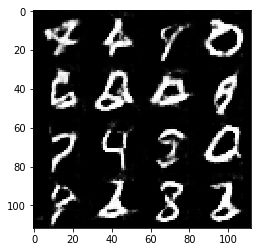

Epoch 2/2... Discriminator Loss: 1.3078... Generator Loss: 0.6088
Epoch 2/2... Discriminator Loss: 1.1617... Generator Loss: 0.8936
Epoch 2/2... Discriminator Loss: 1.1815... Generator Loss: 0.9299
Epoch 2/2... Discriminator Loss: 1.2081... Generator Loss: 0.9479
Epoch 2/2... Discriminator Loss: 1.3292... Generator Loss: 0.6807
Epoch 2/2... Discriminator Loss: 1.2022... Generator Loss: 1.1138
Epoch 2/2... Discriminator Loss: 1.2346... Generator Loss: 0.6751
Epoch 2/2... Discriminator Loss: 1.2257... Generator Loss: 0.9417
Epoch 2/2... Discriminator Loss: 1.2200... Generator Loss: 0.9528
Epoch 2/2... Discriminator Loss: 1.1737... Generator Loss: 1.0289


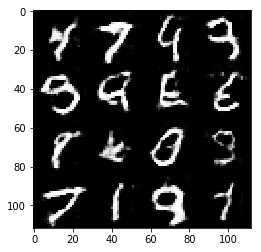

Epoch 2/2... Discriminator Loss: 1.2048... Generator Loss: 1.1987
Epoch 2/2... Discriminator Loss: 1.2436... Generator Loss: 0.7749
Epoch 2/2... Discriminator Loss: 1.1692... Generator Loss: 0.8375
Epoch 2/2... Discriminator Loss: 1.2293... Generator Loss: 0.7227
Epoch 2/2... Discriminator Loss: 1.1839... Generator Loss: 1.0156
Epoch 2/2... Discriminator Loss: 1.1914... Generator Loss: 0.7293
Epoch 2/2... Discriminator Loss: 1.2722... Generator Loss: 0.7451


In [ ]:
batch_size = 64
z_dim = 128
learning_rate = 0.0001
beta1 = 0.4

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 2.2615... Generator Loss: 0.2870
Epoch 1/1... Discriminator Loss: 1.3114... Generator Loss: 0.7158
Epoch 1/1... Discriminator Loss: 1.4047... Generator Loss: 0.5389
Epoch 1/1... Discriminator Loss: 1.1099... Generator Loss: 1.7010
Epoch 1/1... Discriminator Loss: 1.0423... Generator Loss: 1.2864
Epoch 1/1... Discriminator Loss: 1.0264... Generator Loss: 1.0025
Epoch 1/1... Discriminator Loss: 0.7393... Generator Loss: 1.5767
Epoch 1/1... Discriminator Loss: 0.8464... Generator Loss: 1.4059
Epoch 1/1... Discriminator Loss: 0.9544... Generator Loss: 2.1207
Epoch 1/1... Discriminator Loss: 1.1951... Generator Loss: 0.8163


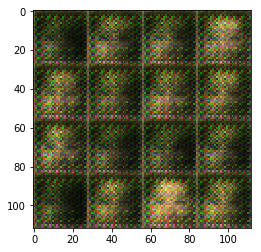

Epoch 1/1... Discriminator Loss: 1.0824... Generator Loss: 0.8416
Epoch 1/1... Discriminator Loss: 1.0735... Generator Loss: 1.3219
Epoch 1/1... Discriminator Loss: 1.1504... Generator Loss: 1.3202
Epoch 1/1... Discriminator Loss: 1.3253... Generator Loss: 1.0757
Epoch 1/1... Discriminator Loss: 1.2070... Generator Loss: 0.8150
Epoch 1/1... Discriminator Loss: 1.2028... Generator Loss: 0.7342
Epoch 1/1... Discriminator Loss: 1.2081... Generator Loss: 0.7378
Epoch 1/1... Discriminator Loss: 1.2266... Generator Loss: 0.8083
Epoch 1/1... Discriminator Loss: 1.6780... Generator Loss: 0.3618
Epoch 1/1... Discriminator Loss: 1.7133... Generator Loss: 1.9232


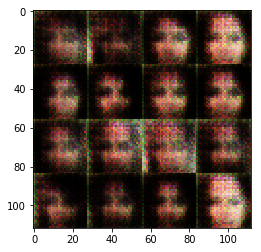

Epoch 1/1... Discriminator Loss: 1.2097... Generator Loss: 1.8991
Epoch 1/1... Discriminator Loss: 1.7701... Generator Loss: 0.3271
Epoch 1/1... Discriminator Loss: 0.9484... Generator Loss: 1.2544
Epoch 1/1... Discriminator Loss: 0.9055... Generator Loss: 1.2557
Epoch 1/1... Discriminator Loss: 1.2118... Generator Loss: 0.6574
Epoch 1/1... Discriminator Loss: 0.9620... Generator Loss: 1.6213
Epoch 1/1... Discriminator Loss: 1.3079... Generator Loss: 0.5594
Epoch 1/1... Discriminator Loss: 1.9088... Generator Loss: 2.5314
Epoch 1/1... Discriminator Loss: 1.1165... Generator Loss: 0.8063
Epoch 1/1... Discriminator Loss: 0.8897... Generator Loss: 1.5200


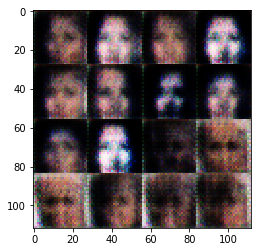

Epoch 1/1... Discriminator Loss: 0.9937... Generator Loss: 1.0406
Epoch 1/1... Discriminator Loss: 1.0699... Generator Loss: 0.9849
Epoch 1/1... Discriminator Loss: 1.3703... Generator Loss: 0.5373
Epoch 1/1... Discriminator Loss: 0.8206... Generator Loss: 1.4052
Epoch 1/1... Discriminator Loss: 1.0417... Generator Loss: 0.9284
Epoch 1/1... Discriminator Loss: 0.9494... Generator Loss: 1.1664
Epoch 1/1... Discriminator Loss: 0.9853... Generator Loss: 1.1324
Epoch 1/1... Discriminator Loss: 1.5511... Generator Loss: 0.4395
Epoch 1/1... Discriminator Loss: 1.1437... Generator Loss: 0.9096
Epoch 1/1... Discriminator Loss: 1.2319... Generator Loss: 0.6122


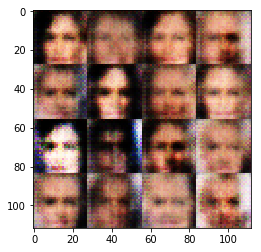

Epoch 1/1... Discriminator Loss: 1.0282... Generator Loss: 1.5470
Epoch 1/1... Discriminator Loss: 0.9714... Generator Loss: 1.4551
Epoch 1/1... Discriminator Loss: 1.2428... Generator Loss: 0.7113
Epoch 1/1... Discriminator Loss: 1.4379... Generator Loss: 0.8348
Epoch 1/1... Discriminator Loss: 0.9567... Generator Loss: 1.4976
Epoch 1/1... Discriminator Loss: 1.1324... Generator Loss: 0.9501
Epoch 1/1... Discriminator Loss: 1.0132... Generator Loss: 1.0788
Epoch 1/1... Discriminator Loss: 1.4480... Generator Loss: 0.5179
Epoch 1/1... Discriminator Loss: 1.0819... Generator Loss: 0.9722
Epoch 1/1... Discriminator Loss: 1.1767... Generator Loss: 1.5421


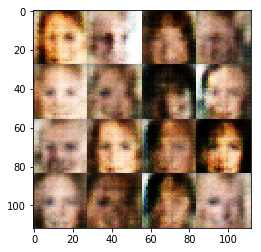

Epoch 1/1... Discriminator Loss: 1.8013... Generator Loss: 0.4723
Epoch 1/1... Discriminator Loss: 1.2247... Generator Loss: 1.2494
Epoch 1/1... Discriminator Loss: 0.8984... Generator Loss: 1.1908
Epoch 1/1... Discriminator Loss: 1.2262... Generator Loss: 0.7843
Epoch 1/1... Discriminator Loss: 1.2688... Generator Loss: 0.6437
Epoch 1/1... Discriminator Loss: 1.1230... Generator Loss: 0.8715
Epoch 1/1... Discriminator Loss: 1.1776... Generator Loss: 1.4031
Epoch 1/1... Discriminator Loss: 1.4058... Generator Loss: 0.5562
Epoch 1/1... Discriminator Loss: 1.2961... Generator Loss: 0.8254
Epoch 1/1... Discriminator Loss: 1.4754... Generator Loss: 0.8815


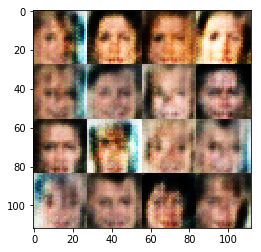

Epoch 1/1... Discriminator Loss: 1.5406... Generator Loss: 0.4246
Epoch 1/1... Discriminator Loss: 1.5462... Generator Loss: 0.4565
Epoch 1/1... Discriminator Loss: 1.0557... Generator Loss: 1.2513
Epoch 1/1... Discriminator Loss: 1.2383... Generator Loss: 1.1216
Epoch 1/1... Discriminator Loss: 1.3989... Generator Loss: 0.4686
Epoch 1/1... Discriminator Loss: 0.9723... Generator Loss: 1.2793
Epoch 1/1... Discriminator Loss: 1.6595... Generator Loss: 0.3406
Epoch 1/1... Discriminator Loss: 0.6982... Generator Loss: 1.9413
Epoch 1/1... Discriminator Loss: 1.1826... Generator Loss: 1.2641
Epoch 1/1... Discriminator Loss: 1.1432... Generator Loss: 1.7918


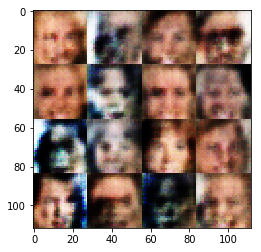

Epoch 1/1... Discriminator Loss: 1.0181... Generator Loss: 1.7030
Epoch 1/1... Discriminator Loss: 0.9632... Generator Loss: 1.3411
Epoch 1/1... Discriminator Loss: 1.0524... Generator Loss: 0.8312
Epoch 1/1... Discriminator Loss: 1.1946... Generator Loss: 0.6672
Epoch 1/1... Discriminator Loss: 1.1587... Generator Loss: 1.3717
Epoch 1/1... Discriminator Loss: 1.3918... Generator Loss: 0.5494
Epoch 1/1... Discriminator Loss: 0.7553... Generator Loss: 1.7044
Epoch 1/1... Discriminator Loss: 0.9484... Generator Loss: 1.6935
Epoch 1/1... Discriminator Loss: 0.8854... Generator Loss: 1.9548
Epoch 1/1... Discriminator Loss: 0.8100... Generator Loss: 1.2272


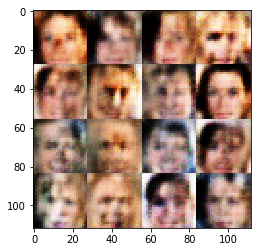

Epoch 1/1... Discriminator Loss: 1.0081... Generator Loss: 2.8184
Epoch 1/1... Discriminator Loss: 1.0748... Generator Loss: 0.8355
Epoch 1/1... Discriminator Loss: 0.9114... Generator Loss: 2.9191
Epoch 1/1... Discriminator Loss: 0.7553... Generator Loss: 1.5096
Epoch 1/1... Discriminator Loss: 0.7666... Generator Loss: 1.9417
Epoch 1/1... Discriminator Loss: 0.9977... Generator Loss: 0.8754
Epoch 1/1... Discriminator Loss: 1.0514... Generator Loss: 0.9266
Epoch 1/1... Discriminator Loss: 1.1297... Generator Loss: 0.7142
Epoch 1/1... Discriminator Loss: 0.9827... Generator Loss: 1.2432
Epoch 1/1... Discriminator Loss: 0.8424... Generator Loss: 1.6151


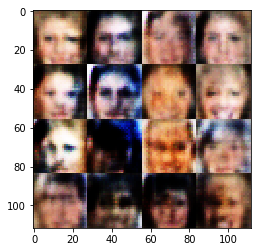

Epoch 1/1... Discriminator Loss: 0.9805... Generator Loss: 1.0202
Epoch 1/1... Discriminator Loss: 1.0532... Generator Loss: 0.9344
Epoch 1/1... Discriminator Loss: 0.9407... Generator Loss: 1.4259
Epoch 1/1... Discriminator Loss: 0.8930... Generator Loss: 1.8501
Epoch 1/1... Discriminator Loss: 1.7928... Generator Loss: 1.6848
Epoch 1/1... Discriminator Loss: 0.7943... Generator Loss: 1.6225
Epoch 1/1... Discriminator Loss: 0.7001... Generator Loss: 1.6157
Epoch 1/1... Discriminator Loss: 1.3298... Generator Loss: 0.8517
Epoch 1/1... Discriminator Loss: 1.2824... Generator Loss: 1.1127
Epoch 1/1... Discriminator Loss: 0.8103... Generator Loss: 1.9622


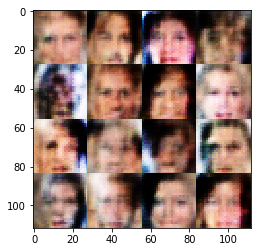

Epoch 1/1... Discriminator Loss: 0.8799... Generator Loss: 1.2784
Epoch 1/1... Discriminator Loss: 0.6824... Generator Loss: 1.6974
Epoch 1/1... Discriminator Loss: 0.8746... Generator Loss: 1.5972
Epoch 1/1... Discriminator Loss: 0.7539... Generator Loss: 1.8330
Epoch 1/1... Discriminator Loss: 0.7277... Generator Loss: 2.0417
Epoch 1/1... Discriminator Loss: 2.1558... Generator Loss: 0.2064
Epoch 1/1... Discriminator Loss: 0.8667... Generator Loss: 1.3545
Epoch 1/1... Discriminator Loss: 0.8411... Generator Loss: 1.3747
Epoch 1/1... Discriminator Loss: 1.1562... Generator Loss: 0.7493
Epoch 1/1... Discriminator Loss: 1.6019... Generator Loss: 0.5914


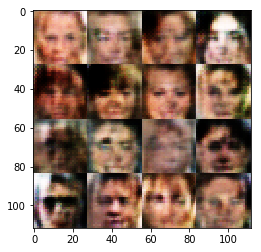

Epoch 1/1... Discriminator Loss: 1.0067... Generator Loss: 0.9446
Epoch 1/1... Discriminator Loss: 0.8535... Generator Loss: 1.3421
Epoch 1/1... Discriminator Loss: 0.8983... Generator Loss: 1.4141
Epoch 1/1... Discriminator Loss: 1.0818... Generator Loss: 1.4810


In [ ]:
batch_size = 64
z_dim = 100
learning_rate = 0.0003
beta1 = 0.3


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.